# Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.signal import find_peaks
from scipy.stats import linregress

import plotly.express as px
import plotly.graph_objects as go

# Loading Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/synthetic_environment_economic_data.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,Year,CO2_Country A,CO2_Country B,CO2_Country C,CO2_Country D,CO2_Country E,GDP_Country A,GDP_Country B,GDP_Country C,GDP_Country D,GDP_Country E
0,1980,6764,5400,5978,7240,6867,1815,1880,2549,2327,2320
1,1981,4022,5950,4848,4896,5410,1191,1987,1630,2139,1950
2,1982,5144,6454,5761,5121,5443,2455,2158,2393,1766,1527
3,1983,5333,6494,4794,5313,4145,1794,1991,2189,3129,1978
4,1984,2447,5653,5864,4257,7269,1522,1827,1768,2240,1229


# 1) Trend Analysis with Line Plot:
Trend analysis using a line plot is a common method to visualize data trends over time.

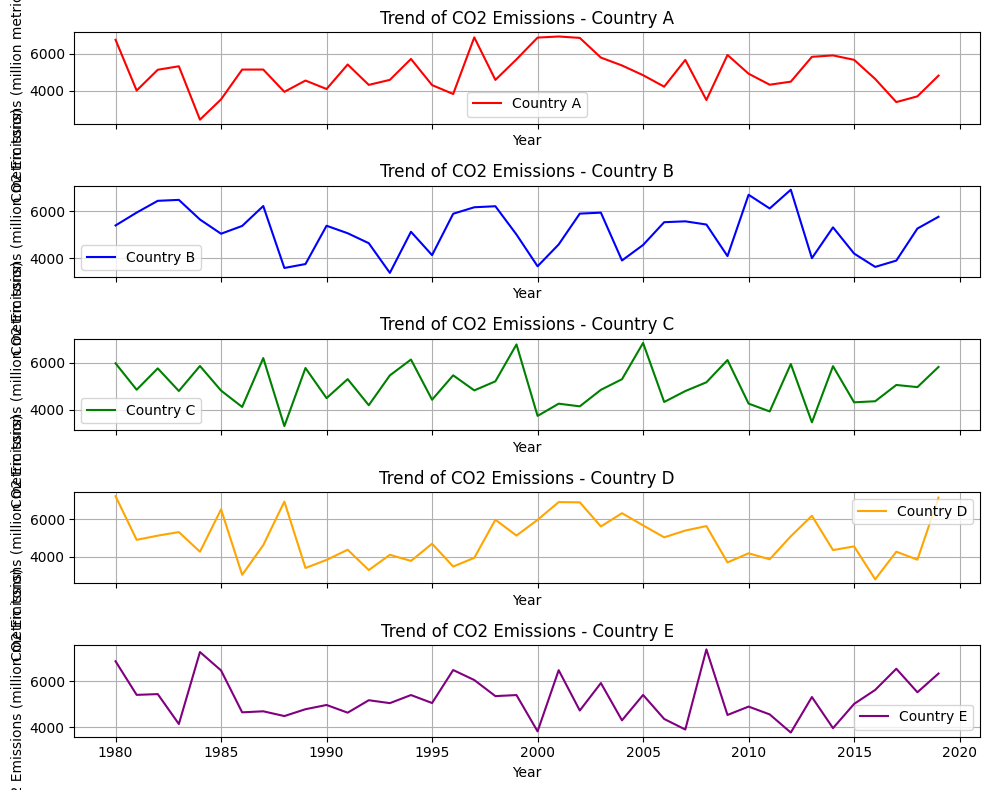

In [ ]:
import matplotlib.pyplot as plt

# Define a list of colors
color_palette = ['red', 'blue', 'green', 'orange', 'purple']

# Convert the list of colors to a dictionary with countries as keys
colors = {country: color_palette[i % len(color_palette)] for i, country in enumerate(countries)}

# Plot each country's CO2 emissions on separate subplots
fig, axes = plt.subplots(len(countries), 1, figsize=(10, 8), sharex=True)

for i, country in enumerate(countries):
    ax = axes[i]
    # Plotting CO2 emissions for each country
    ax.plot(df['Year'], df[f'CO2_{country}'], label=country, color=colors.get(country, 'blue'))
    ax.set_title(f'Trend of CO2 Emissions - {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (million metric tons)')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
fig = px.line(df, x='Year', y=['CO2_Country A', 'CO2_Country B', 'CO2_Country C', 'CO2_Country D', 'CO2_Country E'],
              labels={'value': 'CO2 Emissions', 'Year': 'Year'},
              title='CO2 Emissions Over Time')

fig.update_layout(title_x=0.5)
fig.show()

**Conclusion**:

Across nations, there are notable disparities in CO2 emissions, with Country E demonstrating the most significant fluctuations, trailed by Country D, which exhibits the second-highest variability. Subsequently, both Country A and Country C showcase considerable fluctuations. Conversely, Country B presents the most stable emission pattern among all nations observed.

# 2) Relationship Analysis with Scatter Plot
A scatter plot visually represents the relationship between two variables. By plotting data points on a graph, it helps to observe patterns or correlations between the variables at a glance.

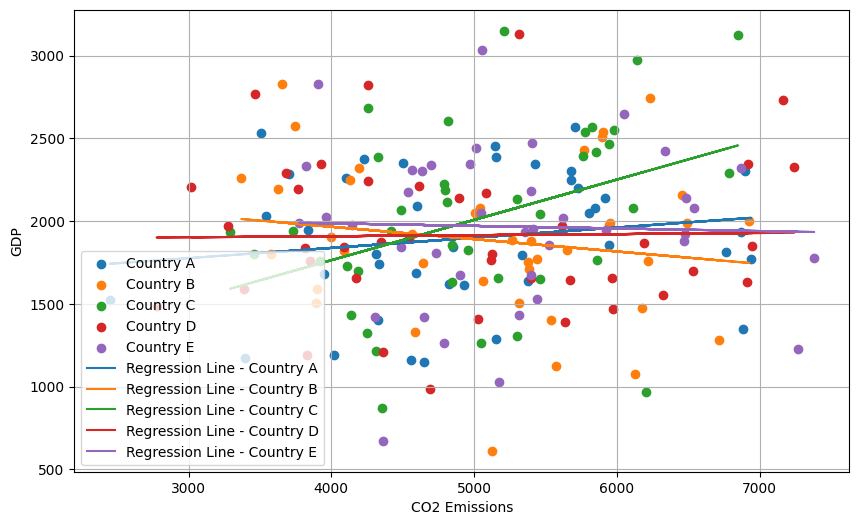

In [ ]:
#CO2 Emissions vs GDP for Each Country

plt.figure(figsize=(10, 6))
plt.scatter(df['CO2_Country A'], df['GDP_Country A'], label='Country A')
plt.scatter(df['CO2_Country B'], df['GDP_Country B'], label='Country B')
plt.scatter(df['CO2_Country C'], df['GDP_Country C'], label='Country C')
plt.scatter(df['CO2_Country D'], df['GDP_Country D'], label='Country D')
plt.scatter(df['CO2_Country E'], df['GDP_Country E'], label='Country E')

# Calculate and plot the regression lines
for country in ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']:
    x = df[f'CO2_{country}']
    y = df[f'GDP_{country}']
    coeffs = np.polyfit(x, y, 1)
    plt.plot(x, np.polyval(coeffs, x), label=f'Regression Line - {country}')

plt.xlabel('CO2 Emissions')
plt.ylabel('GDP')
plt.grid()
plt.legend()

In [ ]:

# Initialize an empty DataFrame to store the reshaped data
data_reshaped = pd.DataFrame()

# Assuming you have defined `df` elsewhere in your code

# Reshape the data for Plotly Express
countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']

for country in countries:
    temp_df = pd.DataFrame({'CO2': df[f'CO2_{country}'], 'GDP': df[f'GDP_{country}'], 'Country': country})
    data_reshaped = pd.concat([data_reshaped, temp_df])

# Plot the reshaped data with regression lines using Plotly Express
fig = px.scatter(data_reshaped, x='GDP', y='CO2', color='Country', title='CO2 Emissions vs GDP',
                 trendline='ols')  # Ordinary Least Squares (OLS) regression line
fig.show()


**Conclusion**:

In the scatter plots representing Country_A, Country_D, and Country_C, a clear upward trend is evident, indicating that as GDP increases, CO2 emissions also tend to rise. The data points are closely clustered around the regression line, particularly noticeable in the case of Country_C, illustrating a robust relationship. However, for Country_D, the regression line's slope is less steep, suggesting a weaker correlation.

Conversely, in the scatter plots representing Country_E and Country_B, a downward trend is observed, indicating that as GDP increases, CO2 emissions tend to decrease. The data points exhibit more dispersion around the regression line, indicating a less consistent relationship. Both countries' regression lines have negative slopes, reflecting this negative correlation.

# 3) Distribution Analysis with Histogram
A histogram provides a visual representation of the distribution of a dataset by grouping data into intervals or bins and displaying the frequency of occurrences within each bin. This helps to understand the overall shape and spread of the data, including any patterns or outliers present.

In [ ]:
 df.set_index(["Year"], inplace = True)
 df.head()

,CO2_Country A,CO2_Country B,CO2_Country C,CO2_Country D,CO2_Country E,GDP_Country A,GDP_Country B,GDP_Country C,GDP_Country D,GDP_Country E
Year,,,,,,,,,,
1980,6764,5400,5978,7240,6867,1815,1880,2549,2327,2320
1981,4022,5950,4848,4896,5410,1191,1987,1630,2139,1950
1982,5144,6454,5761,5121,5443,2455,2158,2393,1766,1527
1983,5333,6494,4794,5313,4145,1794,1991,2189,3129,1978
1984,2447,5653,5864,4257,7269,1522,1827,1768,2240,1229


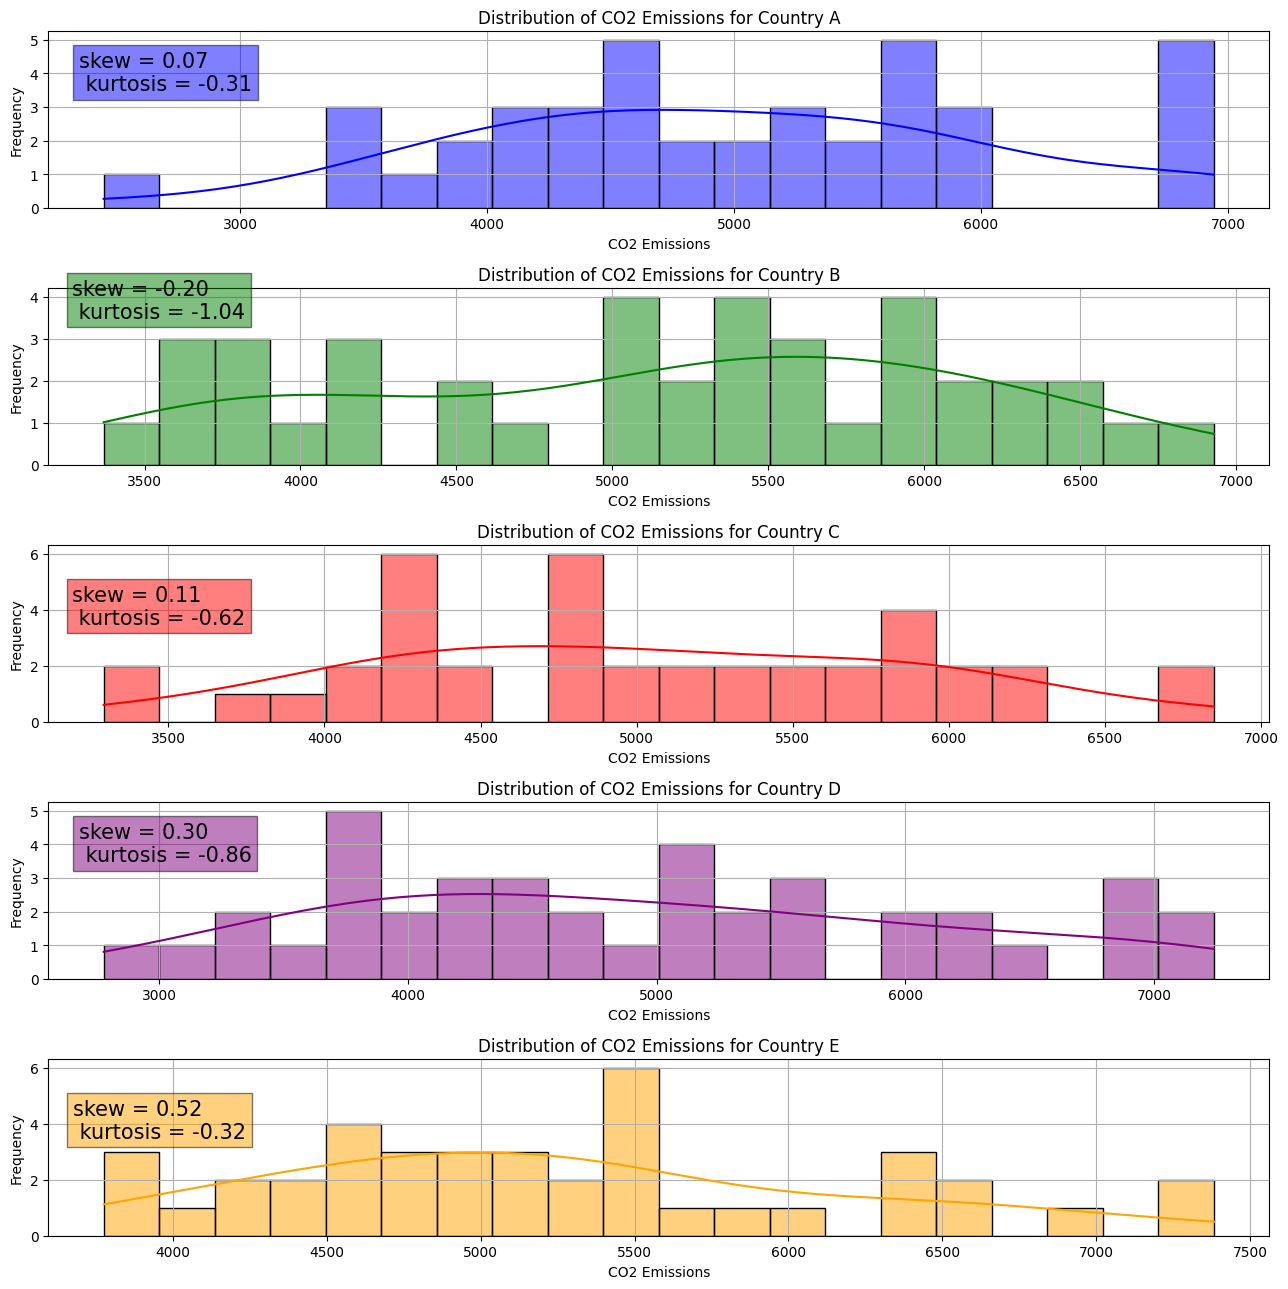

In [ ]:
colors = {
    'Country A': 'blue',
    'Country B': 'green',
    'Country C': 'red',
    'Country D': 'purple',
    'Country E': 'orange'}

fig, axs = plt.subplots(5, figsize=(13, 13))

for ind, country in enumerate(colors.keys()):  # Use country names as keys
    column = f'CO2_{country}'
    sns.histplot(data=df, x=column, bins=20, kde=True, color=colors[country], ax=axs[ind])
    axs[ind].set_title(f'Distribution of CO2 Emissions for {country}')
    axs[ind].set_xlabel('CO2 Emissions')
    axs[ind].set_ylabel('Frequency')
    axs[ind].grid(True)

    # Calculate skewness and kurtosis
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    axs[ind].text(df[column].min() - 100, 3.5, f'skew = {skewness:.2f} \n kurtosis = {kurtosis:.2f}', fontsize=15, bbox=dict(facecolor=colors[country], alpha=0.5))

plt.tight_layout()
plt.show()

Plotly does not directly support histograms with the same interactivity as the line graph. However, we can create a similar interactive effect by generating histograms for each country separately and then combining them into a single figure.

In [ ]:
# Sample dataframe for demonstration
# Replace this with your actual dataframe
np.random.seed(0)
data = {'CO2_Country A': np.random.normal(0, 1, 1000),
        'CO2_Country B': np.random.normal(1, 1.5, 1000),
        'CO2_Country C': np.random.normal(2, 0.5, 1000),
        'CO2_Country D': np.random.normal(-1, 2, 1000),
        'CO2_Country E': np.random.normal(1.5, 1, 1000)}
df = pd.DataFrame(data)

colors = {
    'Country A': 'blue',
    'Country B': 'green',
    'Country C': 'red',
    'Country D': 'purple',
    'Country E': 'orange'}

fig = go.Figure()

for country, color in colors.items():
    column = f'CO2_{country}'
    hist_data = df[column].dropna()
    fig.add_trace(go.Histogram(x=hist_data, name=f'Distribution of CO2 Emissions for {country}', marker_color=color, opacity=0.7))

    # Compute skewness and kurtosis
    skewness = np.round(pd.Series.skew(hist_data), 2)
    kurtosis = np.round(pd.Series.kurtosis(hist_data), 2)

    # Add annotations for skewness and kurtosis
    fig.add_annotation(
        x=0.95,
        y=0.9 - list(colors.keys()).index(country) * 0.1,
        xref='paper',
        yref='paper',
        text=f'Skewness: {skewness}<br>Kurtosis: {kurtosis}',
        showarrow=False,
        font=dict(
            size=10,
            color='black'
        )
    )

fig.update_layout(
    title="Distribution of CO2 Emissions",
    xaxis_title="CO2 Emissions",
    yaxis_title="Frequency",
    barmode='overlay',  # Overlay histograms on top of each other
    legend_title="Country",
    bargap=0.1,  # Gap between bars
    annotations=[]  # Clear default annotations
)

fig.show()


**Conclusion**:

Regarding the kurtosis of CO2 emissions among the five countries, a low value suggests that the data is distributed relatively evenly across the range of values, resulting in a flatter peak. This implies fewer occurrences of extreme CO2 emission values compared to what would be anticipated in a normal distribution.

Regarding the skewness of CO2 emissions among the five countries, a right-skewed distribution indicates a higher frequency of high CO2 emission values, resulting in a longer or fatter tail on the right side of the distribution. This suggests that certain countries may experience a greater prevalence of extreme CO2 emission levels compared to others.

#4) Correlation Analysis with Heatmap
A heatmap visually represents the correlation between variables in a dataset, with colors indicating the strength and direction of correlation. It helps identify relationships between variables, revealing potential patterns or dependencies within the data.

In [ ]:
df.head()

,CO2_Country A,CO2_Country B,CO2_Country C,CO2_Country D,CO2_Country E,GDP_Country A,GDP_Country B,GDP_Country C,GDP_Country D,GDP_Country E
Year,,,,,,,,,,
1980,6764,5400,5978,7240,6867,1815,1880,2549,2327,2320
1981,4022,5950,4848,4896,5410,1191,1987,1630,2139,1950
1982,5144,6454,5761,5121,5443,2455,2158,2393,1766,1527
1983,5333,6494,4794,5313,4145,1794,1991,2189,3129,1978
1984,2447,5653,5864,4257,7269,1522,1827,1768,2240,1229


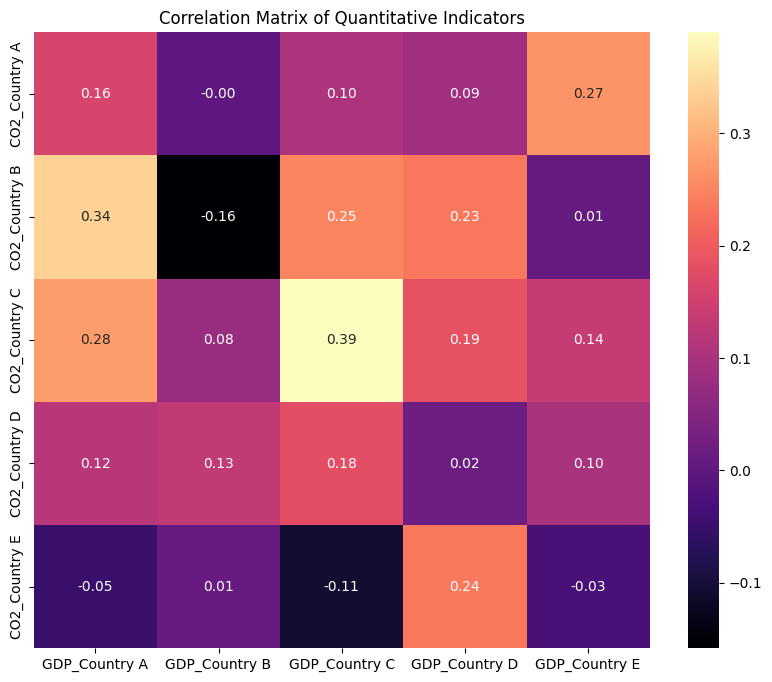

In [ ]:
# Set figure size
plt.figure(figsize=(10, 8))

# Compute correlation matrix and select relevant rows and columns
corr_matrix = df.corr()
relevant_corr = corr_matrix.iloc[0:5, 5:]

# Create heatmap
sns.heatmap(relevant_corr, annot=True, cmap='magma', fmt=".2f", square=True)

# Set title
plt.title('Correlation Matrix of Quantitative Indicators')

# Show plot
plt.show()

In [ ]:
import plotly.graph_objects as go

# Compute correlation matrix and select relevant rows and columns
corr_matrix = df.corr()
relevant_corr = corr_matrix.iloc[0:5, 5:]

# Create annotations for heatmap
annotations = []
for i, row in enumerate(relevant_corr.index):
    for j, col in enumerate(relevant_corr.columns):
        annotations.append(dict(text="{:.2f}".format(relevant_corr.iloc[i, j]),
                                x=j, y=i,
                                xref='x1', yref='y1',
                                font=dict(color='white' if relevant_corr.iloc[i, j] > 0.5 else 'black'),
                                showarrow=False))

# Create heatmap trace
heatmap = go.Heatmap(z=relevant_corr.values,
                     x=relevant_corr.columns,
                     y=relevant_corr.index,
                     colorscale='magma',
                     colorbar=dict(title='Correlation'),
                     hoverongaps=False)

# Define layout
layout = go.Layout(title='Correlation Matrix of Quantitative Indicators',
                   annotations=annotations)

# Create figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show interactive plot
fig.show()


**Conclusion**:


1. The countries Country_A, Country_D, and Country_C demonstrate a positive correlation between CO2 emissions and GDP,implying that as their GDP increases, their CO2 emissions tend to increase as well. Among them, Country_C stands out with the highest correlation coefficient, indicating a robust relationship between economic activity and CO2 emissions. However, Country_D exhibits a weaker positive correlation compared to the other countries, as its correlation coefficient approaches zero.

2. Conversely, Country_E and Country_B exhibit a negative correlation between CO2 emissions and GDP, meaning that as their GDP increases, their CO2 emissions decrease. This negative correlation suggests a potential decoupling of economic growth from environmental impact, signaling the adoption of more sustainable economic development practices.

# 5) Spatial Analysis with Choropleth Map
 A choropleth map is a spatial analysis tool that uses color shading to represent statistical data aggregated over predefined geographic areas, such as countries, states, or regions. It helps visualize spatial patterns and variations in the data across different geographical regions, aiding in the identification of trends or disparities.

In [ ]:
import geopandas as gpd
#Obtain a shapefile of world countries from datasets.
#Extract the shapefile for the countries you're interested in.
#Identify the countries in the extracted shapefile and rename them to match the country names in your dataset.

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world["name"].isin(["Afghanistan", "Bangladesh", "Bhutan", "China", "Pakistan"])][["name", "geometry"]]
world.set_index(["name"], inplace = True)
world.rename(index  = {key : value for key, value in zip(world.index, df.columns[1:6])}, inplace = True)

<ipython-input-121-389218efe058>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:

# Merge world geometry with CO2 emissions data
map_df = pd.merge(world, df.T, left_index=True, right_index=True)
map_df["Total_CO2"] = map_df.iloc[:, 1:].sum(axis=1)

# Create choropleth map
fig = px.choropleth(map_df,
                    geojson=world.geometry,
                    locations=map_df.index,
                    color="Total_CO2",
                    hover_name=map_df.index,
                    color_continuous_scale='magma',
                    title="Choropleth Map of CO2 Emissions by Country",
                    labels={'Total_CO2':'CO2 Emissions'},
                    )

# Show interactive plot
fig.show()

**Conclusion**:

Between 1980 and 2019, Country E emerges as the largest emitter of carbon dioxide, significantly surpassing others. Following closely behind are Country B and Country C, both emitting substantial amounts. Country D emits comparatively less, indicating a more environmentally conscious approach compared to the other three countries. However, Country A distinguishes itself by emitting substantially less, highlighting its dedication to environmental protection.
